In [1]:
# Append 'src' directory to import modules from notebooks directory
#################################
import os,sys
src_dir = os.path.join(os.getcwd(), os.pardir)
sys.path.append(src_dir)
##################################

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 150)

import time
import os 
from src.PatchMatch import PatchMatchOrig
import torchvision.models as models
import numpy as np
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import torch.utils.model_zoo as model_zoo
import cv2
import torchvision
from torchvision import transforms
from torchvision.utils import make_grid
from PIL import Image
from collections import OrderedDict
from PIL import Image
from src.models import VGG19
from src import Utils

Populating the interactive namespace from numpy and matplotlib


In [3]:
model = VGG19()
model.model

FeatureExtractor (
  (conv_1_1__0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_1_1__1): ReLU ()
  (conv_1_2__2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_1_2__3): ReLU ()
  (pool_1__4): AvgPool2d (size=2, stride=2, padding=0, ceil_mode=False, count_include_pad=True)
  (conv_2_1__5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_2_1__6): ReLU ()
  (conv_2_2__7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_2_2__8): ReLU ()
  (pool_2__9): AvgPool2d (size=2, stride=2, padding=0, ceil_mode=False, count_include_pad=True)
  (conv_3_1__10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_3_1__11): ReLU ()
  (conv_3_2__12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_3_2__13): ReLU ()
  (conv_3_3__14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_3_3__15): ReLU ()
  (conv_3_4__16): C

In [217]:
img1_path = './ann.jpg'
img2_path = './sugarskull-B.jpg'

img1 = Utils.load_image(img_path=img1_path,to_array=True,to_variable=True)
img2 = Utils.load_image(img_path=img2_path,to_array=True,to_variable=True)

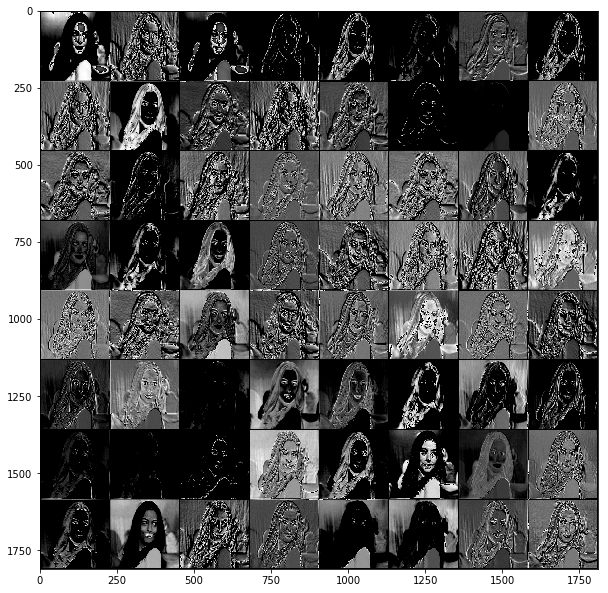

In [218]:
feat1 = model.get_features_for_layer(img_tensor=img1,layer_num=1).squeeze().numpy()
feat2 = model.get_features_for_layer(img_tensor=img2,layer_num=1).squeeze().numpy()
plt.imshow(Utils.get_viz_tensor(torch.from_numpy(feat1)))

In [219]:
# feat1_norm = feat1/(feat1.max()-feat1.min())
# feat2_norm = feat2/(feat2.max() - feat2.min() )

# feat1_norm = feat1/(feat1.max())
# feat2_norm = feat2/(feat2.max() )

feat1_norm = (feat1 - np.mean(feat1))/(np.std(feat1))
feat2_norm = (feat2 - np.mean(feat2))/(np.std(feat2))


feat1_np_t = feat1_norm.transpose(1,2,0)
feat2_np_t = feat2_norm.transpose(1,2,0)

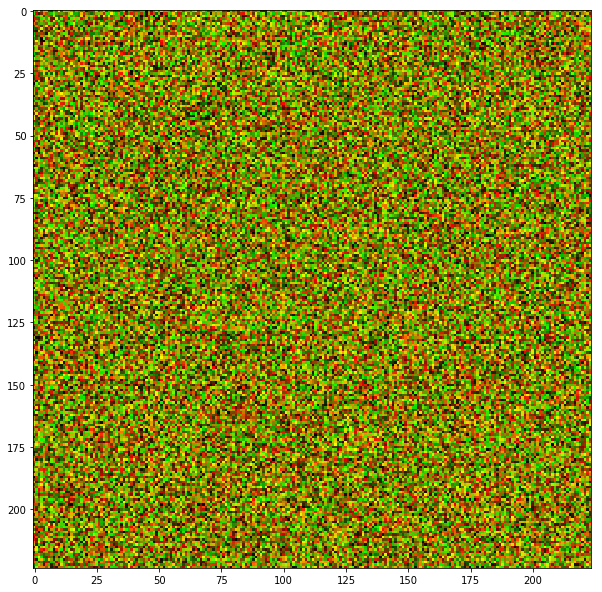

In [220]:
pm = PatchMatchOrig(feat1_np_t,feat2_np_t, 1)
plt.imshow(pm.visualize())

done iteration 1
done iteration 2
done iteration 3
done iteration 4
done iteration 5
Done


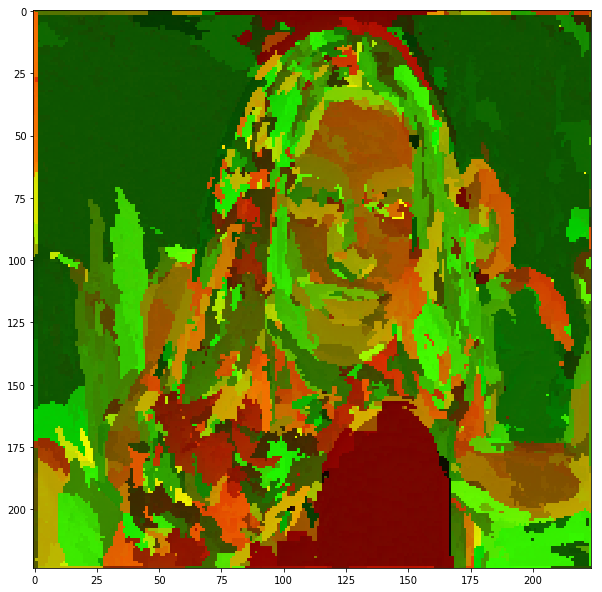

In [221]:
pm.propagate(iters=5,rand_search_radius=6)
plt.imshow(pm.visualize())

In [222]:
img1_raw = Utils.load_image(img_path=img1_path,to_array=False,to_variable=False).numpy().transpose(1,2,0)
img2_raw = Utils.load_image(img_path=img2_path,to_array=False,to_variable=False).numpy().transpose(1,2,0)

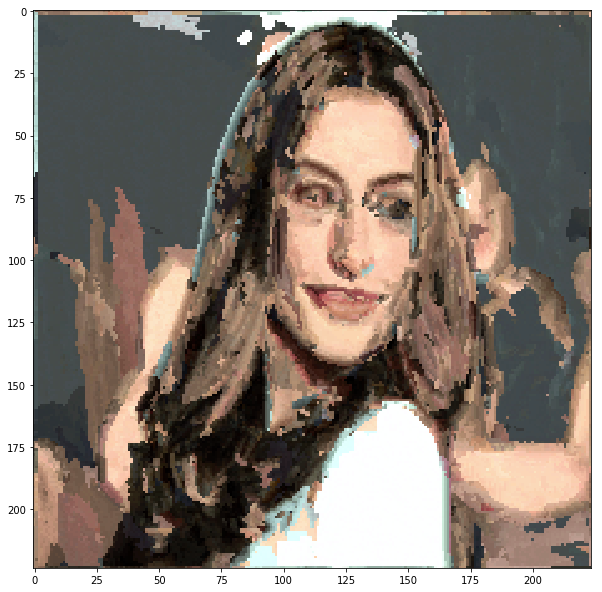

In [223]:
recon = Utils.reconstruct_image(img2_raw,scale=1,size=224,pm=pm)
plt.imshow(Utils.deprocess_image(recon))